# Practice Python for AI  
Including: Pandas-using using Penguin dataset; Visualization - Matplotlib & Seaborn; Numpy.

# PANDAS PRACTICE

In [62]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [64]:
df = pd.DataFrame(penguins)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [65]:
df.shape

(344, 7)

In [66]:
df.columns.tolist()

['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex']

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [68]:
## index
df.set_index('species', inplace=True)
df.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [69]:
df.reset_index(inplace=True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [70]:
# sorting
df.sort_values(by='body_mass_g', kind='mergesort', ascending=False)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
237,Gentoo,Biscoe,49.2,15.2,221.0,6300.0,Male
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male
297,Gentoo,Biscoe,51.1,16.3,220.0,6000.0,Male
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,Male
299,Gentoo,Biscoe,45.2,16.4,223.0,5950.0,Male
...,...,...,...,...,...,...,...
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,Female
64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,Female
190,Chinstrap,Dream,46.9,16.6,192.0,2700.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN


In [71]:
## Check null (missing values)
print(penguins.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


Ex1: Filling mising values with the mean

In [72]:
## First way: using DataFrame
df.bill_depth_mm = df.bill_depth_mm.fillna(df.bill_depth_mm.mean())
df.bill_length_mm = df.bill_length_mm.fillna(df.bill_length_mm.mean())
df.flipper_length_mm = df.flipper_length_mm.fillna(df.flipper_length_mm.mean())
df.body_mass_g = df.body_mass_g.fillna(df.body_mass_g.mean())

df.sex = df.sex.fillna(df.sex.mode()[0]) # as sex is categorical, using mode (most frequent value) to handle missing values.

# Check null
df[df.isna().any(axis=1)]
print(df.isnull().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [73]:
## Second way: using Imputer
from sklearn.impute import SimpleImputer

imputer1 = SimpleImputer(missing_values=np.nan, strategy='mean')
penguins[['bill_length_mm','bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] = imputer1.fit_transform(penguins[['bill_length_mm','bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])

imputer2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
penguins['sex'] = imputer2.fit_transform(penguins[['sex']])[:, 0]

print(penguins.isnull().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


Ex2: Find all Adelie penguins with a body mass greater than 4000 grams.

In [74]:
adelie_body = df[(df['species'] == 'Adelie') & (df['body_mass_g'] > 4000)]
adelie_body[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]

,bill_length_mm,bill_depth_mm,flipper_length_mm
3,43.92193,17.15117,200.915205
7,39.20000,19.60000,195.000000
9,42.00000,20.20000,190.000000
14,34.60000,21.10000,198.000000
17,42.50000,20.70000,197.000000
19,46.00000,21.50000,194.000000
35,39.20000,21.10000,196.000000
39,39.80000,19.10000,184.000000
43,44.10000,19.70000,196.000000
45,39.60000,18.80000,190.000000


Ex3: Show max index of each category in each species.

In [75]:
df.groupby(['species']).max()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,Torgersen,46.0,21.5,210.0,4775.0,Male
Chinstrap,Dream,58.0,20.8,212.0,4800.0,Male
Gentoo,Biscoe,59.6,17.3,231.0,6300.0,Male


Ex4: Show average body_mass_g of female penguins.

In [76]:
female_body_mass_avg = df[df['sex'] == 'Female']['body_mass_g'].mean()
print(female_body_mass_avg)

3862.2727272727275


Ex5: Find which species has the largest average bill length.

In [77]:
avg_bill_length = df.groupby('species')['bill_length_mm'].mean()
spec_avg_bill_length = avg_bill_length.idxmax()
print(f"{spec_avg_bill_length} has the largest average bill length")

Chinstrap has the largest average bill length


Ex6: Find the top 5 heaviest penguins.

In [78]:
top_5_heaviest = df.nlargest(5, 'body_mass_g')
print(top_5_heaviest[['species', 'body_mass_g']])

    species  body_mass_g
237  Gentoo       6300.0
253  Gentoo       6050.0
297  Gentoo       6000.0
337  Gentoo       6000.0
299  Gentoo       5950.0


# VISUALIZATION

To visualize the data, we usually use 2 python libraries:
1. **Matplotlib:**
  * Used for creating static, animated and interactive plots.
  * Offering a variety of plotting functionalities: Bar Chart, Line Chart, Pie Chart, Bubble Chart, Radar Chart, ScatterPlot, Histogram, Heatmap, BoxPlot, Tree Map, Network Diagram...
    * Customizing plots with labels, titles, legends and color schemes.
    * Adjusting figure size, layout and aspect ratios.

2. **Seaborn:**
  * Built on top of Matplotlib and provides beautiful default styles and color palettes to make statistical plots more attractive.

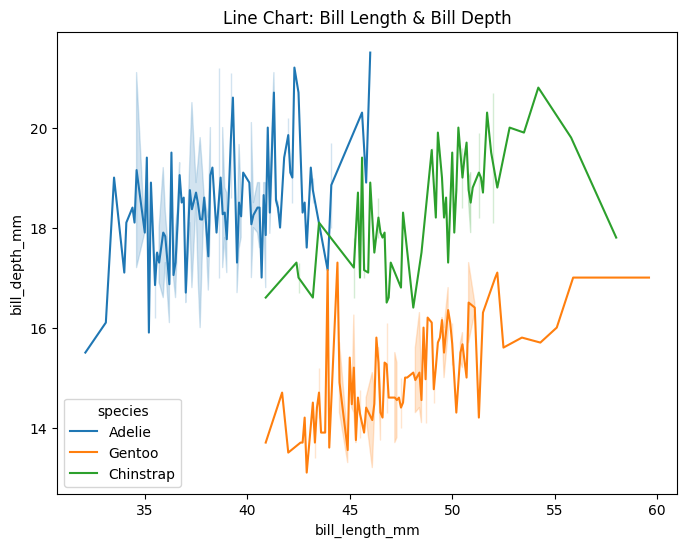

In [79]:
## line chart
plt.figure(figsize=(8,6))
sns.lineplot(data=penguins.sort_values('bill_length_mm'), x="bill_length_mm", y="bill_depth_mm", hue="species")  # distinguished by color
plt.title("Line Chart: Bill Length & Bill Depth")
plt.show()

The line chart above shows how bill length changes along with bill depth for each species. On average, we have:
  * Adelie has short but deep bills.
  * Gentoo has long but narrow bills.
  * Chinstrap has medium size for both categories :v

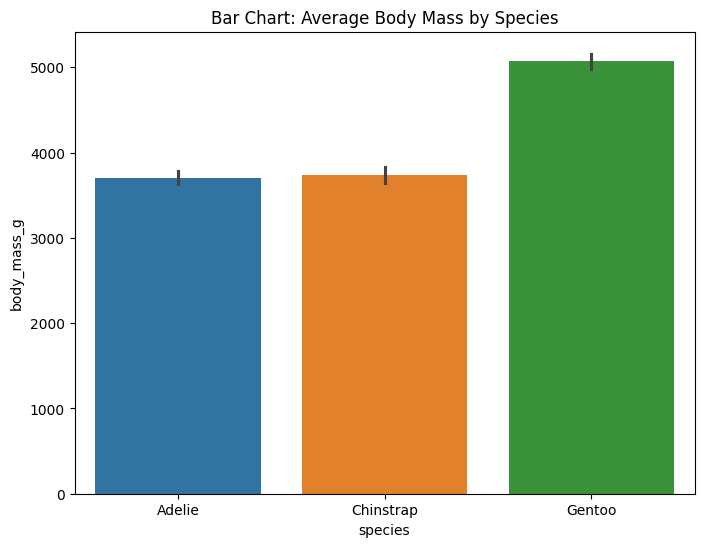

In [80]:
## bar chart
plt.figure(figsize=(8,6))
sns.barplot(data=penguins, x="species", y="body_mass_g", hue='species')
plt.title("Bar Chart: Average Body Mass by Species")
plt.show()

The bar chart above compares the average body mass of penguins across different species.

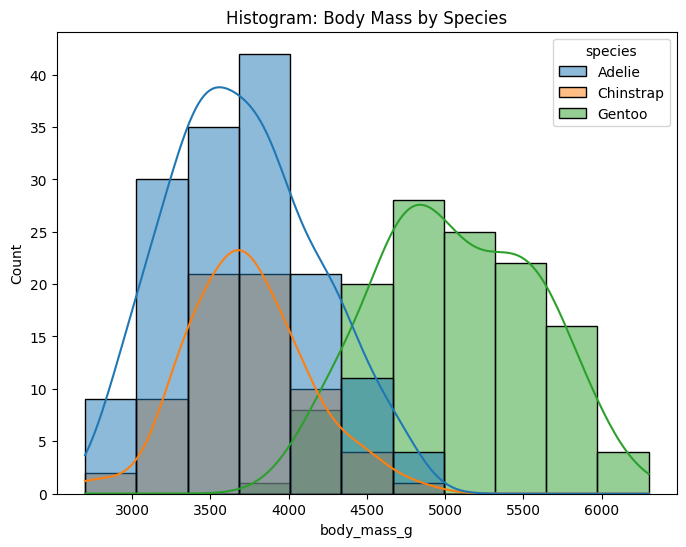

In [81]:
## Histogram
plt.figure(figsize=(8,6))
sns.histplot(data=penguins, x="body_mass_g", hue="species", kde=True)
plt.title("Histogram: Body Mass by Species")
plt.show()

The histogram above shows the distribution of body mass for 3 species (more details the the bar chart). In general, Gentoo's mass-body distributions overlap considerately => significantly heavier than 2 other species.

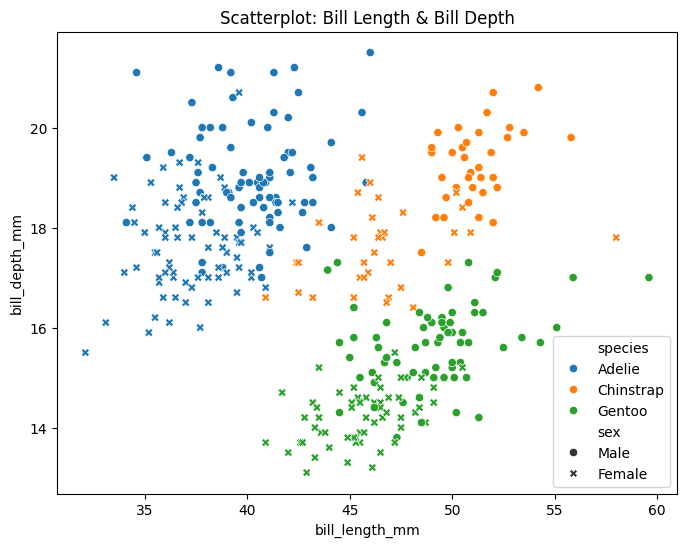

In [82]:
## ScatterPlot
plt.figure(figsize=(8,6))
sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", style="sex")
plt.title("Scatterplot: Bill Length & Bill Depth")
plt.show()

Scatterplot shows distinct clusters to compare length and depth of bills, showing distinct clusters by species & sex. Generally, for each species, male penguins have larger (?) bills than female ones.

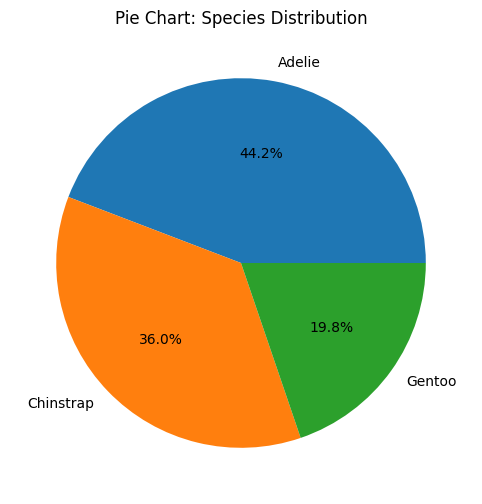

In [83]:
## Pie Chart
plt.figure(figsize=(8,6))
plt.pie(penguins['species'].value_counts(), labels=penguins['species'].unique(), autopct='%1.1f%%')   # Seaborn doesn't have a built-in function for creating pie charts directly
plt.title("Pie Chart: Species Distribution")
plt.show()

# NUMPY PRACTICE

## Getting started

In [84]:
ls = [1, 2, 3, 4, 5, 6 ,7 , 8, 9, 10]
arr1 = np.array(ls)

# Check the diff between a list and a numpy array
print(f'a list: {ls} - type: {type(ls)}')
print(f'a numpy array: {arr1} - type: {type(arr1)}')

a list: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] - type: <class 'list'>
a numpy array: [ 1  2  3  4  5  6  7  8  9 10] - type: <class 'numpy.ndarray'>


In [85]:
arr2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Check dimension (dim), shape & datatype
print(arr2)
print(f'dim = {arr2.ndim} - shape: {arr2.shape} - datatype: {arr2.dtype}')

[[1 2 3]
 [4 5 6]
 [7 8 9]]
dim = 2 - shape: (3, 3) - datatype: int64


In [86]:
zeros = np.zeros((3,5))  # Create a 3x5 matrix filled with 0
ones = np.ones((3,3))    # Create a 3x3 matrix filled with 1
print(zeros)
print('')
print(ones)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


## Index & Slicing
!!! always starts from 0

In [87]:
arr = np.arange(1, 11)
arr_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print(arr)
print(arr_2d)

[ 1  2  3  4  5  6  7  8  9 10]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [88]:
# Indexing 1D arrays
print(arr[5])
print(arr[0])
print(arr[-1])

6
1
10


In [89]:
# Slicing 1D arrays
print(arr[2:8])
print(arr[:6])
print(arr[5:])
print(arr[::2])
print(arr[::-1])      # reversed

[3 4 5 6 7 8]
[1 2 3 4 5 6]
[ 6  7  8  9 10]
[1 3 5 7 9]
[10  9  8  7  6  5  4  3  2  1]


In [90]:
# Indexing 2D arrays
print(arr_2d[1, 2])   #
print(arr_2d[0])      # first row
print(arr_2d[:, 0])   # first column

6
[1 2 3]
[1 4 7]


In [91]:
# Slicing 2D arrays
print(arr_2d[:2])     # First two rows
print(arr_2d[:, -2:]) # Last two columns
print(arr_2d[:2, 1:]) # Sub-matrix (rows 0-1, columns 1-2)

[[1 2 3]
 [4 5 6]]
[[2 3]
 [5 6]
 [8 9]]
[[2 3]
 [5 6]]


## Reshape, Resize & Flatten

In [92]:
## Reshape an array
arr3 = np.arange(1, 21)
print(f'Origin array: \n{arr3}\n')

arr4 = arr3.reshape(2, 10)   # conditions: total elements of the new & old matrix must be the same
print(f'Reshape: \n{arr4}\n')

# or use -1 to let NumPy automatically calculate the size of that dimension
arr4 = np.reshape(arr3, (5, -1))
print(f'Reshape (with -1): \n{arr4}\n')

Origin array: 
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]

Reshape: 
[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]]

Reshape (with -1): 
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]



In [93]:
## Resize: change the total number of elements.
# if the new size is larger than the original, it repeats the elements until it's full.
# if the new size is smaller, elements are truncated.

arr5 = np.array([1, 2, 3, 4, 5])
print(f'Original array:\n{arr5}\n')

arr_resized1 = np.resize(arr5, (4, 3))
print(f'Resized array (larger - return new arr):\n{arr_resized1}\n')
print(f'Resized array (larger - inplace): \n{arr5.resize(4, 3)}\n')

arr_resized2 = np.resize(arr5, (2, 3))
print(f'Resized array (smaller):\n{arr_resized2}\n')

Original array:
[1 2 3 4 5]

Resized array (larger - return new arr):
[[1 2 3]
 [4 5 1]
 [2 3 4]
 [5 1 2]]

Resized array (larger - inplace): 
None

Resized array (smaller):
[[1 2 3]
 [4 5 0]]



In [94]:
## Flatten an array: converts any multi-dimensional NumPy array into a 1D array
arr5 = arr4.flatten()
print(arr5)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


## Random module

In [95]:
## Basic random generators
# generates uniform random floats between 0 and 1:
print(f'uniform rand: {np.random.rand(5)}')      # or np.random.random() to use tuple. Ex: np.random.random((2, 5))

# generates random numbers from a standard normal distribution (mean = 0, std = 1):
print(f'standard normal distribution rand: {np.random.randn(5)}')

# generates random intergers:
# np.random.randint(<low>, <high>, size=None); np shall generate numbers from <low> to <high>-1
print(f'interger rand: {np.random.randint(0, 15, size=(5))}')

# generates a sequence
print(f'sequence: {np.arange(0, 10, 2)}')       # using np.arange(start, stop, step)
print(f'linspace: {np.linspace(1, 10, 10)}')    # using np.linspace(star, stop, <num>); divided the range
                                                # from start to stop into <num> equally spaced values.

uniform rand: [0.43283478 0.85586235 0.2436742  0.920324   0.04530832]
standard normal distribution rand: [ 1.0276598   0.51939449 -0.4865703  -0.03611832 -0.06443885]
interger rand: [10  7  4 11 14]
sequence: [0 2 4 6 8]
linspace: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


## Mathematical Operations
This section shall include Arithmetic operations, Aggregation Functions (sum, mean, max, min) & Mathematic functions
## 1. Arithemetic Operations:



In [96]:
arr = np.arange(0, 11)

# with a constant
print(f'Addition: \n{arr + 1}\n')
print(f'Subtraction: \n{arr - 1}\n')
print(f'Multiplication: \n{arr * 2}\n')
print(f'Division: \n{arr / 2}\n')     # same with %
print(f'Exponent (power): \n{arr ** 2}\n')

Addition: 
[ 1  2  3  4  5  6  7  8  9 10 11]

Subtraction: 
[-1  0  1  2  3  4  5  6  7  8  9]

Multiplication: 
[ 0  2  4  6  8 10 12 14 16 18 20]

Division: 
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]

Exponent (power): 
[  0   1   4   9  16  25  36  49  64  81 100]



In [97]:
arr1 = np.arange(0, 11)
arr2 = np.array([10, 15, 100, 30, 7, 11, 21, 9, 33, 14, 25])

# with other arrays
print(f'Addition: \n{arr1 + arr2}')
add = np.add(arr1, arr2)
print(f'{add}\n')

print(f'Subtraction: \n{arr1 - arr2}')
sub = np.subtract(arr1, arr2)
print(f'{sub}\n')

print(f'Multiplication: \n{arr1 * arr2}')     # for this arithmetic operation, each element in
mul = np.multiply(arr1, arr2)                 # arr1 is multiplied by the element in the same position in arr2.
print(f'{mul}\n')

print(f'Division: \n{arr1 / arr2}')
div = np.divide(arr1, arr2)
print(f'{div}\n')

print(f'Modulus: \n{arr1 % arr2}')
mod = np.mod(arr1, arr2)
print(f'{mod}\n')

print(f'Exponent (power): \n{arr1 ** arr2}')
exp = np.power(arr1, arr2 )
print(f'{exp}\n')

Addition: 
[ 10  16 102  33  11  16  27  16  41  23  35]
[ 10  16 102  33  11  16  27  16  41  23  35]

Subtraction: 
[-10 -14 -98 -27  -3  -6 -15  -2 -25  -5 -15]
[-10 -14 -98 -27  -3  -6 -15  -2 -25  -5 -15]

Multiplication: 
[  0  15 200  90  28  55 126  63 264 126 250]
[  0  15 200  90  28  55 126  63 264 126 250]

Division: 
[0.         0.06666667 0.02       0.1        0.57142857 0.45454545
 0.28571429 0.77777778 0.24242424 0.64285714 0.4       ]
[0.         0.06666667 0.02       0.1        0.57142857 0.45454545
 0.28571429 0.77777778 0.24242424 0.64285714 0.4       ]

Modulus: 
[ 0  1  2  3  4  5  6  7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10]

Exponent (power): 
[                  0                   1                   0
     205891132094649               16384            48828125
   21936950640377856            40353607                   0
      22876792454961 1590897978359414784]
[                  0                   1                   0
     205891132094649             

## 2. Aggregation Functions (sum, mean, max, min)

In [98]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
arr_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr_3d = np.array([
    [[1, 2], [3, 4]],
    [[5, 6], [7, 8]]
    ])

In [99]:
# Sum
print(np.sum(arr))                # sum of elements
print(np.sum(arr_2d))
print(np.sum(arr_2d, axis=0))     # sum of elements along columns
print(np.sum(arr_2d, axis=1))     # sum of elements along rows

print(np.sum(arr_3d, axis=0))     # sum of layers by columns (?)
print(np.sum(arr_3d, axis=1))     # sum of layers by rows (?)
print(np.sum(arr_3d, axis=2))     # sum of elements in each matrix

55
45
[12 15 18]
[ 6 15 24]
[[ 6  8]
 [10 12]]
[[ 4  6]
 [12 14]]
[[ 3  7]
 [11 15]]


In [100]:
# Mean (average)
print(np.mean(arr))
print(np.mean(arr_2d))
print(np.mean(arr_2d, axis=0))
print(np.mean(arr_2d, axis=1))

5.5
5.0
[4. 5. 6.]
[2. 5. 8.]


In [101]:
# Max
print(np.max(arr))
print(np.max(arr_2d))
print(np.max(arr_2d, axis=0))
print(np.max(arr_2d, axis=1))

10
9
[7 8 9]
[3 6 9]


In [102]:
# Min
print(np.min(arr))
print(np.min(arr_2d))
print(np.min(arr_2d, axis=0))
print(np.min(arr_2d, axis=1))

1
1
[1 2 3]
[1 4 7]


## 3. Mathematic Functions

- Trigonometric Functions: NumPy fully supports the fundamental trigonometric functions.
Angles are typically calculated in **radians**.

| Function                       | Description                          | Code Example        |
| ------------------------------ | ------------------------------------ | ------------------- |
| `np.sin()`                     | Computes sine element-wise.          | `np.sin(arr)`       |
| `np.cos()`                     | Computes cosine element-wise.        | `np.cos(arr)`       |
| `np.tan()`                     | Computes tangent element-wise.       | `np.tan(arr)`       |
| `np.degrees()`, `np.radians()` | Convert between radians and degrees. | `np.degrees(np.pi)` |

- Exponents and Logarithms: Common functions used for operations involving the number *e* and logarithms.

| Function     | Description                              | Code Example    |
| ------------ | ---------------------------------------- | --------------- |
| `np.exp()`   | Calculates ( e^x ) (natural exponent).   | `np.exp(arr)`   |
| `np.log()`   | Natural logarithm (( \ln x ), base *e*). | `np.log(arr)`   |
| `np.log2()`  | Logarithm base 2 (( \log_2 x )).         | `np.log2(arr)`  |
| `np.log10()` | Logarithm base 10 (( \log_{10} x )).     | `np.log10(arr)` |

- Rounding Functions: Essential functions for numerical computation.

| Function      | Description                                     | Code Example                  |
| ------------- | ----------------------------------------------- | ----------------------------- |
| `np.around()` | Rounds to a specified number of decimal places. | `np.around(1.45, decimals=1)` |
| `np.floor()`  | Rounds down to the nearest integer.             | `np.floor(arr)`               |
| `np.ceil()`   | Rounds up to the nearest integer.               | `np.ceil(arr)`                |
| `np.trunc()`  | Truncates (removes) the decimal part.           | `np.trunc(arr)`               |

- Absolute Value Function

| Function                      | Description                                 | Code Example  |
| ----------------------------- | ------------------------------------------- | ------------- |
| `np.abs()` or `np.absolute()` | Returns the absolute value of each element. | `np.abs(arr)` |

- Other functions like: convolve(), sqrt(), square(), maximum(), minimum()...	(Search GeeksForGeeks for more...)


In [103]:
arr = np.array([-2.5, -1.8, 0, 1.8, 2.5, np.pi/2])

## Trigonometric Functions
print(f"Sine: {np.sin(arr)}")
print(f"Cosine: {np.cos(arr)}")
print(f"Tangent: {np.tan(arr)}")

# radians to degrees
print(f"Convert pi/2 radians to degrees: {np.degrees(np.pi/2)}")
print(f"Convert 90 degrees to radians: {np.radians(90)}")

## Exponents and Logarithms
arr_exp = np.array([0, 1, 2, np.e])
print(f"Exponential: {np.exp(arr_exp)}\n")

arr_log = np.array([1, np.e, np.e**2, 10, 100])
print(f"Natural logarithm _log: {np.log(arr_log)}")
print(f"Logarithm base 2 _log: {np.log2(arr_log)}")
print(f"Logarithm base 10 _log: {np.log10(arr_log)}\n")

## Rounding Functions
arr_round = np.array([-1.6, -1.4, 1.4, 1.6])
print(f"Around 1.45 to 1 decimal place: {np.around(1.45, decimals=1)}")
print(f"Floor: {np.floor(arr_round)}")
print(f"Ceil: {np.ceil(arr_round)}")
print(f"Truncate: {np.trunc(arr_round)}\n")

## Absolute Value Function
arr_abs = np.array([-5, -2, 0, 2, 5])
print(f"Absolute: {np.abs(arr_abs)}\n")

Sine: [-0.59847214 -0.97384763  0.          0.97384763  0.59847214  1.        ]
Cosine: [-8.01143616e-01 -2.27202095e-01  1.00000000e+00 -2.27202095e-01
 -8.01143616e-01  6.12323400e-17]
Tangent: [ 7.47022297e-01  4.28626167e+00  0.00000000e+00 -4.28626167e+00
 -7.47022297e-01  1.63312394e+16]
Convert pi/2 radians to degrees: 90.0
Convert 90 degrees to radians: 1.5707963267948966
Exponential: [ 1.          2.71828183  7.3890561  15.15426224]

Natural logarithm _log: [0.         1.         2.         2.30258509 4.60517019]
Logarithm base 2 _log: [0.         1.44269504 2.88539008 3.32192809 6.64385619]
Logarithm base 10 _log: [0.         0.43429448 0.86858896 1.         2.        ]

Around 1.45 to 1 decimal place: 1.4
Floor: [-2. -2.  1.  1.]
Ceil: [-1. -1.  2.  2.]
Truncate: [-1. -1.  1.  1.]

Absolute: [5 2 0 2 5]



## LINEAR ALGEBRA !!!

In [104]:
# have all arithmetic operators above
# using .dot() for matrix multiplication
arr1 = np.array([[1, 2], [4, 5]])
arr2 = np.array([[7, 8], [9, 10]])

a = 1 + 2j
b = 3 + 4j

print(f'Matrix mul: \n{np.dot(arr1, arr2)}')
print(f'Vector mul: {np.dot(a, b)}')

Matrix mul: 
[[25 28]
 [73 82]]
Vector mul: (-5+10j)


In [105]:
# transpose
arr1.T

array([[1, 4],
       [2, 5]])

In [106]:
# inner/dot product: (tích vô hướng)
print(f'Inner product: \n{np.inner(arr1, arr2)}')

Inner product: 
[[23 29]
 [68 86]]


In [107]:
# outer product: (chưa tìm thấy dịch thuật, tích ngoài?)
print(f'Outer product: \n{np.outer(arr1, arr2)}')

Outer product: 
[[ 7  8  9 10]
 [14 16 18 20]
 [28 32 36 40]
 [35 40 45 50]]


In [108]:
# cross product: (tích có hướng)
arr1 = np.array([[1, 2, 3], [4, 5, 6]])
arr2 = np.array([[7, 8, 9], [10, 11, 12]])

print(f'Cross product: \n{np.cross(arr1, arr2)}')

Cross product: 
[[-6 12 -6]
 [-6 12 -6]]


In [109]:
# determiant: (định thức)
# use np.linalg.det() to compute straightforward the determinant of a matrix
arr1 = np.array([[1, 10, 17],
                 [4, 39, 9],
                 [7, 8, 11]])
print(f'det(arr1) = {np.linalg.det(arr1)}')

# beside, there's np.linalg.slogdet() for seperating the sign and logarithm, and np.linalg.lu for LU method.

det(arr1) = -3549.999999999998


## STATISTICS !!!

1. **Normal Distributions**
- syntax: `numpy.random.normal(loc=0.0, scale=1.0, size=None)`
  * `loc`: specifies the mean of the distribution, where the peak of the bell curve exists.
  * `scale`: determines the spread (standard deviation) of the distribution controlling how flat or narrow the graph is.
  * `size`: defines the shape of the returned array.

In [110]:
print(f'rand number: {np.random.normal(loc=0, scale=1)}\n')
print(f'rand array: \n{np.random.normal(size=(2,3))}')

rand number: 1.0173106246128287

rand array: 
[[-0.04590675 -1.24171451 -1.35211659]
 [-0.38499769  0.66153958 -0.15457642]]


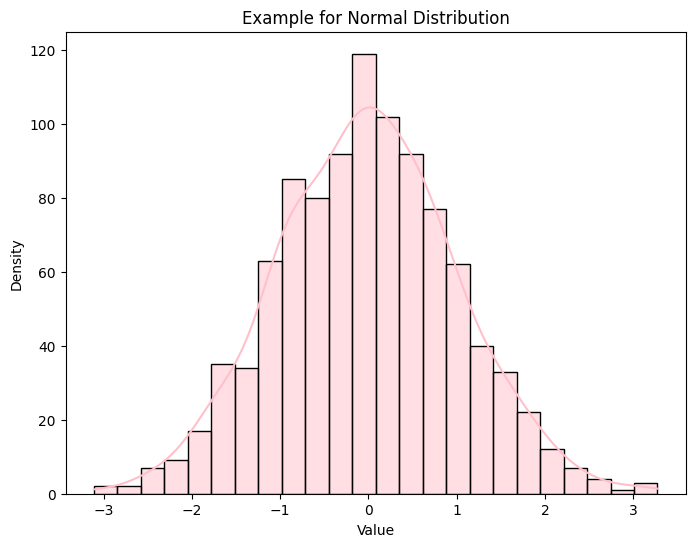

In [111]:
# Visualize
plt.figure(figsize=(8,6))
sns.histplot(np.random.normal(size=1000), kde=True, color='pink')
plt.title("Example for Normal Distribution")
plt.ylabel("Density")
plt.xlabel("Value")
plt.show()

Normal Distribution histogram shows the frequency of generated numbers which highly concentrates at the center (mean $\mu=0$) and symmetrically decreases towards the tails, forming a curve (Bell Curve)

2. **Binomial Distribution** (Phân phối nhị thức)
- models the number of successes in a fixed number of independent trials where each trial has only two possible outcomes (Ex: success or fail)
- syntax: `numpy.random.binomial(n, p, size=None)`
  * `n`: the number of trials.
  * `p`: the probability of success in each trial
  * `size` : the shape of the returned array.

In [112]:
print(f'rand number: {np.random.binomial(n = 10, p = 0.7)}\n')
print(f'rand array: \n{np.random.binomial(n = 10, p = 0.7, size=(2,3))}')

rand number: 9

rand array: 
[[5 7 6]
 [7 9 6]]


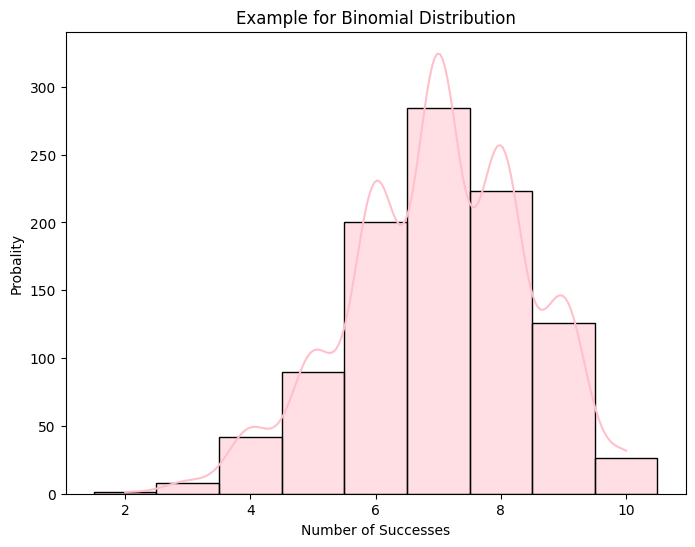

In [113]:
# Visualize
plt.figure(figsize=(8,6))
sns.histplot(np.random.binomial(n=10, p=0.7, size=1000), kde=True, discrete=True, color='pink')
plt.title("Example for Binomial Distribution")

x = np.arange(0, 11)
plt.ylabel("Probality")
plt.xlabel("Number of Successes")
plt.show()

Binomial Distribution histogram represents the frequency plot for discrete counts of successes (from $0$ to $10$).

3. **Poisson DIstribution** (Phân phối Poisson)
- model the number of times an event happens within a fixed time or space when we know the average number of occurrences.
- used for events that occur independently such as customer arrivals at a store, etc.
- syntax: `numpy.random.poisson(lam=1.0, size=None)`
  * `lam` : the average number of events (λ or lambda) expected to occur in the interval.
  * `size` : the shape of the returned array.

In [114]:
print(f'rand number: {np.random.poisson(lam=5)}\n')
print(f'rand array: \n{np.random.poisson(lam=5, size=(2,3))}')

rand number: 3

rand array: 
[[3 6 7]
 [3 7 5]]


<Figure size 800x600 with 0 Axes>

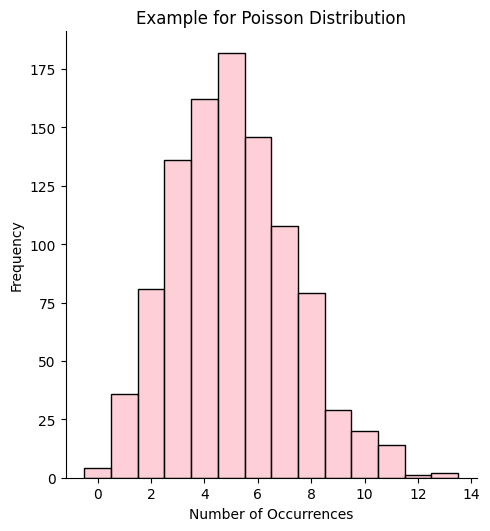

In [115]:
# Visualize
plt.figure(figsize=(8,6))
sns.displot(np.random.poisson(lam=5, size=1000), kde=False, discrete=True, color='pink')
plt.title("Example for Poisson Distribution")
plt.xlabel("Number of Occurrences")
plt.ylabel("Frequency")
plt.show()

Poisson Distribution displot shows the distribution for discrete count data (number of events occurring in a fixed interval), forming a peaked, integer-based shape at ~5 (as λ = 5)

4. **Uniform Distribution** (Phân phối đồng nhất)
- used when all the numbers in a range have the same chance of being picked.
- syntax: `numpy.random.uniform(low=0.0, high=1.0, size=None)`
  * `low`: the lower bound of the range (inclusive)
  * `high`: Tte upper bound of the range (exclusive)

In [116]:
print(f'rand number: {np.random.uniform(low=0.0, high=1.0)}\n')
print(f'rand array: \n{np.random.uniform(low=0.0, high=1.0, size=(2,3))}')

rand number: 0.3791324360018341

rand array: 
[[0.77538264 0.62979873 0.31309403]
 [0.22509245 0.60639493 0.2384487 ]]


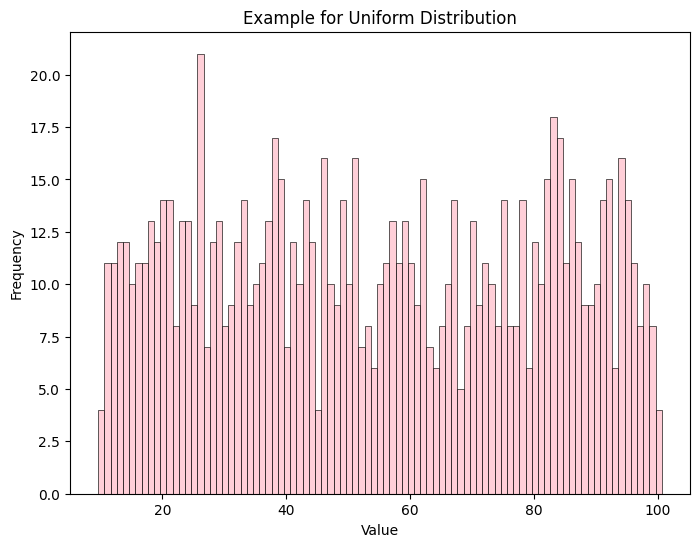

In [117]:
# Visualize
plt.figure(figsize=(8,6))
sns.histplot(np.random.uniform(low=10, high=100, size=1000), kde=False, discrete=True, color='pink')
plt.title("Example for Uniform Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In this histogram, generated numbers are spread almost equally across a range (between $10$ and $100$).

5. **Exponetial Distribution** (Phân phối mũ)
- describe the time between events in a Poisson process where events occur continuously and independently at a constant average rate.
- syntax: `numpy.random.exponential(scale=1.0, size=None)`
  * `scale`: the inverse of the rate parameter (β=1/λ) which determines the spread of the distribution.
  * `size`: like all distributions above.

In [118]:
print(f'rand number: {np.random.exponential(scale=0.7)}\n')
print(f'rand array: \n{np.random.exponential(scale=0.7, size=(2,3))}')

rand number: 0.4138930543196021

rand array: 
[[1.24095767 0.20862307 0.19988327]
 [0.11656873 1.50592729 1.31538443]]


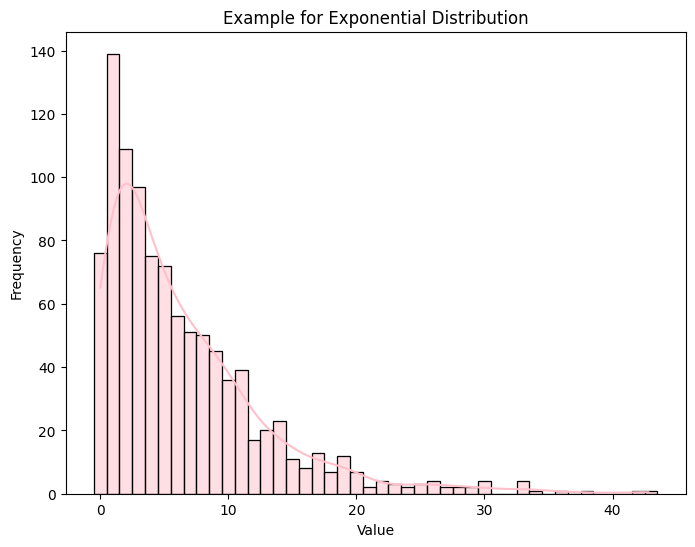

In [119]:
# Visualize
plt.figure(figsize=(8,6))
sns.histplot(np.random.exponential(scale=7, size=1000), kde=True, discrete=True, color='pink', bins=30)
plt.title("Example for Exponential Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

With scale=7, this distribution if heavily right-skewed, peaking nearly at 1 (?). The curve shows the theoretical distribution.

6. **Chi-Square Distribution** (Application: for Classification Tree)
- when we add up the squares of independent random numbers that follow a standard normal distribution, it's used in hypothesis testing to check whether observed data fits a particular distribution or not.
- syntax: `numpy.random.chisquare(df, size=None)`
  * `df`: degrees of freedom (denoted by k) which affects the shape of the distribution.

In [120]:
print(f'rand number: {np.random.chisquare(df=0.7)}\n')
print(f'rand array: \n{np.random.chisquare(df=0.7, size=(2,3))}')

rand number: 0.20525432851533026

rand array: 
[[5.50717896e-02 1.83449918e-02 1.45432240e+00]
 [1.10295807e-03 3.98302603e-01 2.40178016e-01]]


<Figure size 800x600 with 0 Axes>

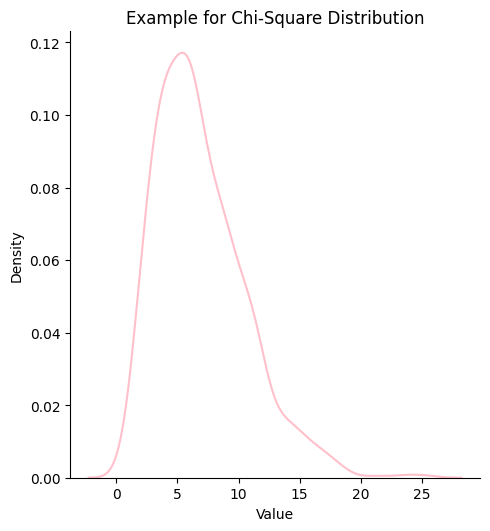

In [121]:
# Visualize
plt.figure(figsize=(8,6))
sns.displot(np.random.chisquare(df=7, size=1000), kind='kde', color='pink')
plt.title("Example for Chi-Square Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

As df = 7 (7 < 30), the curve is skewed to the right meaning lower values occur more frequently and higher values become rarer.

Ex1. Given an integer matrix of NxM, set negative values in the matrix to 0

In [122]:
arr = np.array([[1, -2, 3], [-4, 5, -6], [7, -8, 9]])
print(f'Original matrix:\n{arr}')

arr[arr < 0] = 0
print(f'Result: \n{arr}')

Original matrix:
[[ 1 -2  3]
 [-4  5 -6]
 [ 7 -8  9]]
Result: 
[[1 0 3]
 [0 5 0]
 [7 0 9]]
